# 2 . Propagación temporal sobre estados ligados.

Al sistema anterior se le introduce un potencial que acopla los autoestados $\ket{1}$ y $\ket{2}$ de modo que ahora el hamiltoniano del sistema es:
    

$\hat{H} = E_1 \ket{1}\bra{1} + E_2 \ket{2}\bra{2} 
        + W \left( \ket{1}\bra{2} + \ket{2}\bra{1} \right)$

Si el sistema en $t=0$ está en el estado $\ket{1}$, calcule la probabilidad de encontrar al sistema en los estados $\ket{1}$ y $\ket{2}$ en $t>0$. Utilice los valores $E_1 = -1$, $E_2 = 1$ y $W = 2$ para graficar los resultados.


In [19]:
#Importamos las librerias y funciones que podamos usar sobre la marcha
from scipy import integrate
import math
import numpy as np
import matplotlib.pyplot as plt

### Definicion de las funciones a usar en este ejercicio

In [20]:
#Delta de Kroneker
def dcroc(i, j):
    if i == j:
        return 1
    else:
        return 0

# Definición de bases ortogonales en Rn
def baseRn(dim):
    base = []
    for i in range(1, dim + 1):
        base.append([dcroc(j, i) for j in range(1, dim + 1)])
    return np.array(base)


#Producto punto funcional y vectorial
def dot(dom,fun1,fun2):
    if dom != None:
        inte = integrate.simpson(fun1*fun2,dom)
        return inte
    else:
        # SI estamos aqui es porque fun1 y fun2 se tratan de vectores
        dot_prod = np.sum(fun1*fun2)
        return dot_prod

#Probabilidad de obtener un estado especifico |1>, aproximación del operador propagador mendainte series de Taylor
def prob1(order,H,phi0,t):
    global u1
    hamilt = np.zeros((2, 2))
    for i in range(order):
        hamilt = hamilt + (1 / math.factorial(i)) * (np.linalg.matrix_power(H, i)) * math.pow(t, i) * (-1j) ** i

    phit = hamilt @ phi0
    prob =  abs(dot(None, phit, u1))**2

    return prob


#Probabilidad de obtener un estado especifico |2>, aproximación del operador propagador mendainte series de Taylor
def prob2(order,H,phi0,t): 
    global u2
    hamilt = np.zeros((2, 2))
    for i in range(order):
        hamilt = hamilt + (1 / math.factorial(i)) * (np.linalg.matrix_power(H, i)) * math.pow(t, i) * (-1j) ** i

    phit = hamilt @ phi0
    prob =  abs(dot(None, phit, u2))**2

    return prob

__Definimos una base bidimensional que haga las veces de los ahora estados ligados |1> y |2> del Hamiltoniano. Base ortogonal.__

In [21]:
dim = 2
base = baseRn(dim)

u1 = np.array([base[0]]).T
u2 = np.array([base[1]]).T

print(f"|1> = \n{u1}\n\n||||||||||||||||||||||||||||||\n\n|2> = \n{u2}")

|1> = 
[[1]
 [0]]

||||||||||||||||||||||||||||||

|2> = 
[[0]
 [1]]


__El sistema se haya en el estado |1> en t = 0 , por lo que definimos phi0 como este estado. Con esto definimos el Hamiltoniano, usando los valores del ejercicio como:__

In [22]:
E1,E2,W = -1,1,2

phi0 = u1
H = E1*u1@u1.T + E2*u2@u2.T + W*(u1@u2.T+u2@u1.T)

print(f"|phi(0)> = \n{phi0}\n\n||||||||||||||||||||||||||||||\n\n H = \n{H}")

|phi(0)> = 
[[1]
 [0]]

||||||||||||||||||||||||||||||

 H = 
[[-1  2]
 [ 2  1]]


Ahora utilizamos el propagador temporal para analizar la probabilidad en cada estado subsecuente, el problema es que como
$|1>$ y $|2>$ no son autoestados de $\hat{H}$ , hay que diagonalizar H y encontrar los nuevos autoestados, Luego escribir $|1>$ y $|2>$
desarrollados en la nueva base de autoestados de H.

In [23]:
eigvalsH, eigvectsH = np.linalg.eig(H)

E1prime,E2prime = eigvalsH[0],eigvalsH[1]

u1auto,u2auto = eigvectsH[:,0:1], eigvectsH[:,1:2]

print(f"eigen values of H = {np.array([E1prime,E2prime])}\n")

print(f"eigen vectors of H =\n{np.column_stack((u1auto,u2auto))   }")

eigen values of H = [-2.23606798  2.23606798]

eigen vectors of H =
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


Hallados los autoestados de $H$ y sus nuevos estados de energia, entonces solo escribimos u1 en terminos de __u1auto__ y
__u2auto__, ya que la condicion inicial se haya en el estado $|1>$

Podemos escribir el sistema como: 

$|1> = C1*|u1auto>+C2*|u2auto>$

Resolvemos el sistema:

In [24]:
autoMatrx = np.column_stack((u1auto,u2auto))

consts = autoMatrx.T@u1

phi0 = consts[0][0]*u1auto+ consts[1][0]*u2auto

#Comprobamos que la combinacion esta bien hecha y reconstruye correctamente el vector u1

print(f"phi(0) = C1*|u1auto>+C2*|u2auto> = \n{phi0}\n\n|||||||||||||||||||||||||||||||||\n\n" )


print(f"[C1,C2] = \n {consts}")

phi(0) = C1*|u1auto>+C2*|u2auto> = 
[[1.]
 [0.]]

|||||||||||||||||||||||||||||||||


[C1,C2] = 
 [[-0.85065081]
 [-0.52573111]]


__Ahora si aplicamos la propagación__

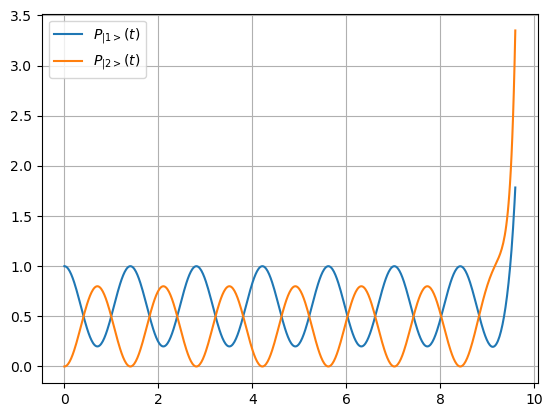

In [25]:
n = 210

t = np.linspace(0,9.6,600)
prob1_arr = []

for i in range(len(t)):
    prob1_arr.append(prob1(n,H,phi0,t[i]))


plt.plot(t,prob1_arr, label = "$P_{|1>}(t)$")

prob2_arr = []

for i in range(len(t)):
    prob2_arr.append(prob2(n,H,phi0,t[i]))

plt.plot(t,prob2_arr, label = "$P_{|2>}(t)$")
plt.grid()
plt.legend()

__Ahora calculamos las soluciones exactas usando el desarrollo completo en series__

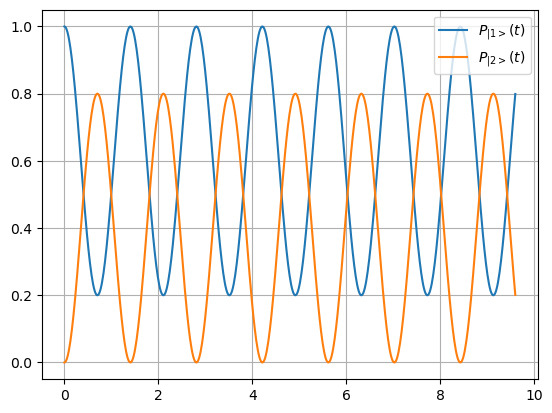

In [26]:
t = np.linspace(0,9.6,600)

phit =  (consts[0][0]*u1auto@np.exp([-1j*E1prime*t])+ consts[1][0]*u2auto@np.exp([-1j*E2prime*t]))

C1sq = []

for i in range(len(t)):
    C1sq.append(abs(dot(None, phit[:,i:i+1], u1))**2)

plt.plot(t,C1sq, label = "$P_{|1>}(t)$")

C2sq = []

for i in range(len(t)):
    C2sq.append(abs(dot(None, phit[:,i:i+1], u2))**2)

plt.plot(t,C2sq, label = "$P_{|2>}(t)$")
plt.grid()
plt.legend()